In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import plotly.express as px

In [132]:
# Load dataset
tr = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CI Assignment/train.csv')
ts = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CI Assignment/test.csv')

# EDA - Exploratory Data Analysis

In [133]:
tr.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [134]:
ts.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [135]:
# Getting the no. of rows and columns in train and test dataset
tr.shape, ts.shape

((76518, 38), (51012, 37))

In [136]:
# Displaying column names in train dataset
print("Column names:")
print(tr.columns)

Column names:
Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Cu

In [137]:
# Displaying column names in test dataset
print("Column names:")
print(ts.columns)

Column names:
Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Cu

In [138]:
# Drop 'id' column from train and test data
tr.drop('id', axis=1, inplace=True)
ts.drop('id', axis=1, inplace=True)

Check Statistical

In [139]:
# Checking whether we have null values in train dataset
tr.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [140]:
# Checking whether we have null values in test dataset
ts.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [141]:
# Checking whether we have duplicate values in train dataset
tr.duplicated().sum()

0

In [142]:
# Checking whether we have duplicate values in test dataset
ts.duplicated().sum()

0

In [60]:
# Checking summary statistics in train dataset
print(tr.describe())

       Marital status  Application mode  Application order        Course  \
count    76518.000000      76518.000000       76518.000000  76518.000000   
mean         1.111934         16.054419           1.644410   9001.286377   
std          0.441669         16.682337           1.229645   1803.438531   
min          1.000000          1.000000           0.000000     33.000000   
25%          1.000000          1.000000           1.000000   9119.000000   
50%          1.000000         17.000000           1.000000   9254.000000   
75%          1.000000         39.000000           2.000000   9670.000000   
max          6.000000         53.000000           9.000000   9991.000000   

       Daytime/evening attendance  Previous qualification  \
count                76518.000000            76518.000000   
mean                     0.915314                3.658760   
std                      0.278416                8.623774   
min                      0.000000                1.000000   
25%       

In [143]:
# Checking the data types of each column
print(tr.dtypes)

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [144]:
# Checking the data types of each column
print(ts.dtypes)

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [145]:
# Check shape of train and test data
print("\n There are {:,} rows and {} columns in the Train Data".format(tr.shape[0],
                                                                           tr.shape[1]))
print("\n There are {:,} rows and {} columns in the Test Data ".format(ts.shape[0],
                                                                           ts.shape[1]))


 There are 76,518 rows and 37 columns in the Train Data

 There are 51,012 rows and 36 columns in the Test Data 


<Axes: xlabel='Target'>

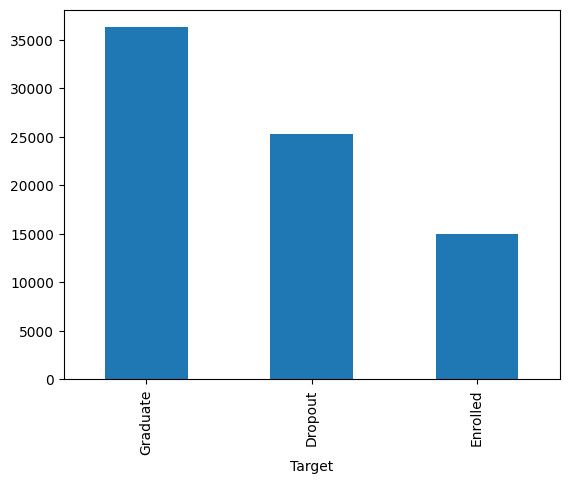

In [146]:
tr.Target.value_counts().plot(kind='bar')

In [147]:
import plotly.graph_objects as go

# Count the occurrences of each unique value in the Target column
target_counts = tr['Target'].value_counts()

# Extract labels and values for the pie chart
labels = target_counts.index.tolist()
values = target_counts.values.tolist()

# Define colors for the pie chart
colors = ['gold', 'red', 'green']

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title='Target Distribution', font=dict(size=30))

# Display the pie chart
fig.show()

In [148]:
# Seek numerical columns
num_cols = tr.select_dtypes(include=['int64', 'float64']).columns
print('Categorical Columns:', num_cols)

Categorical Columns: Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'C

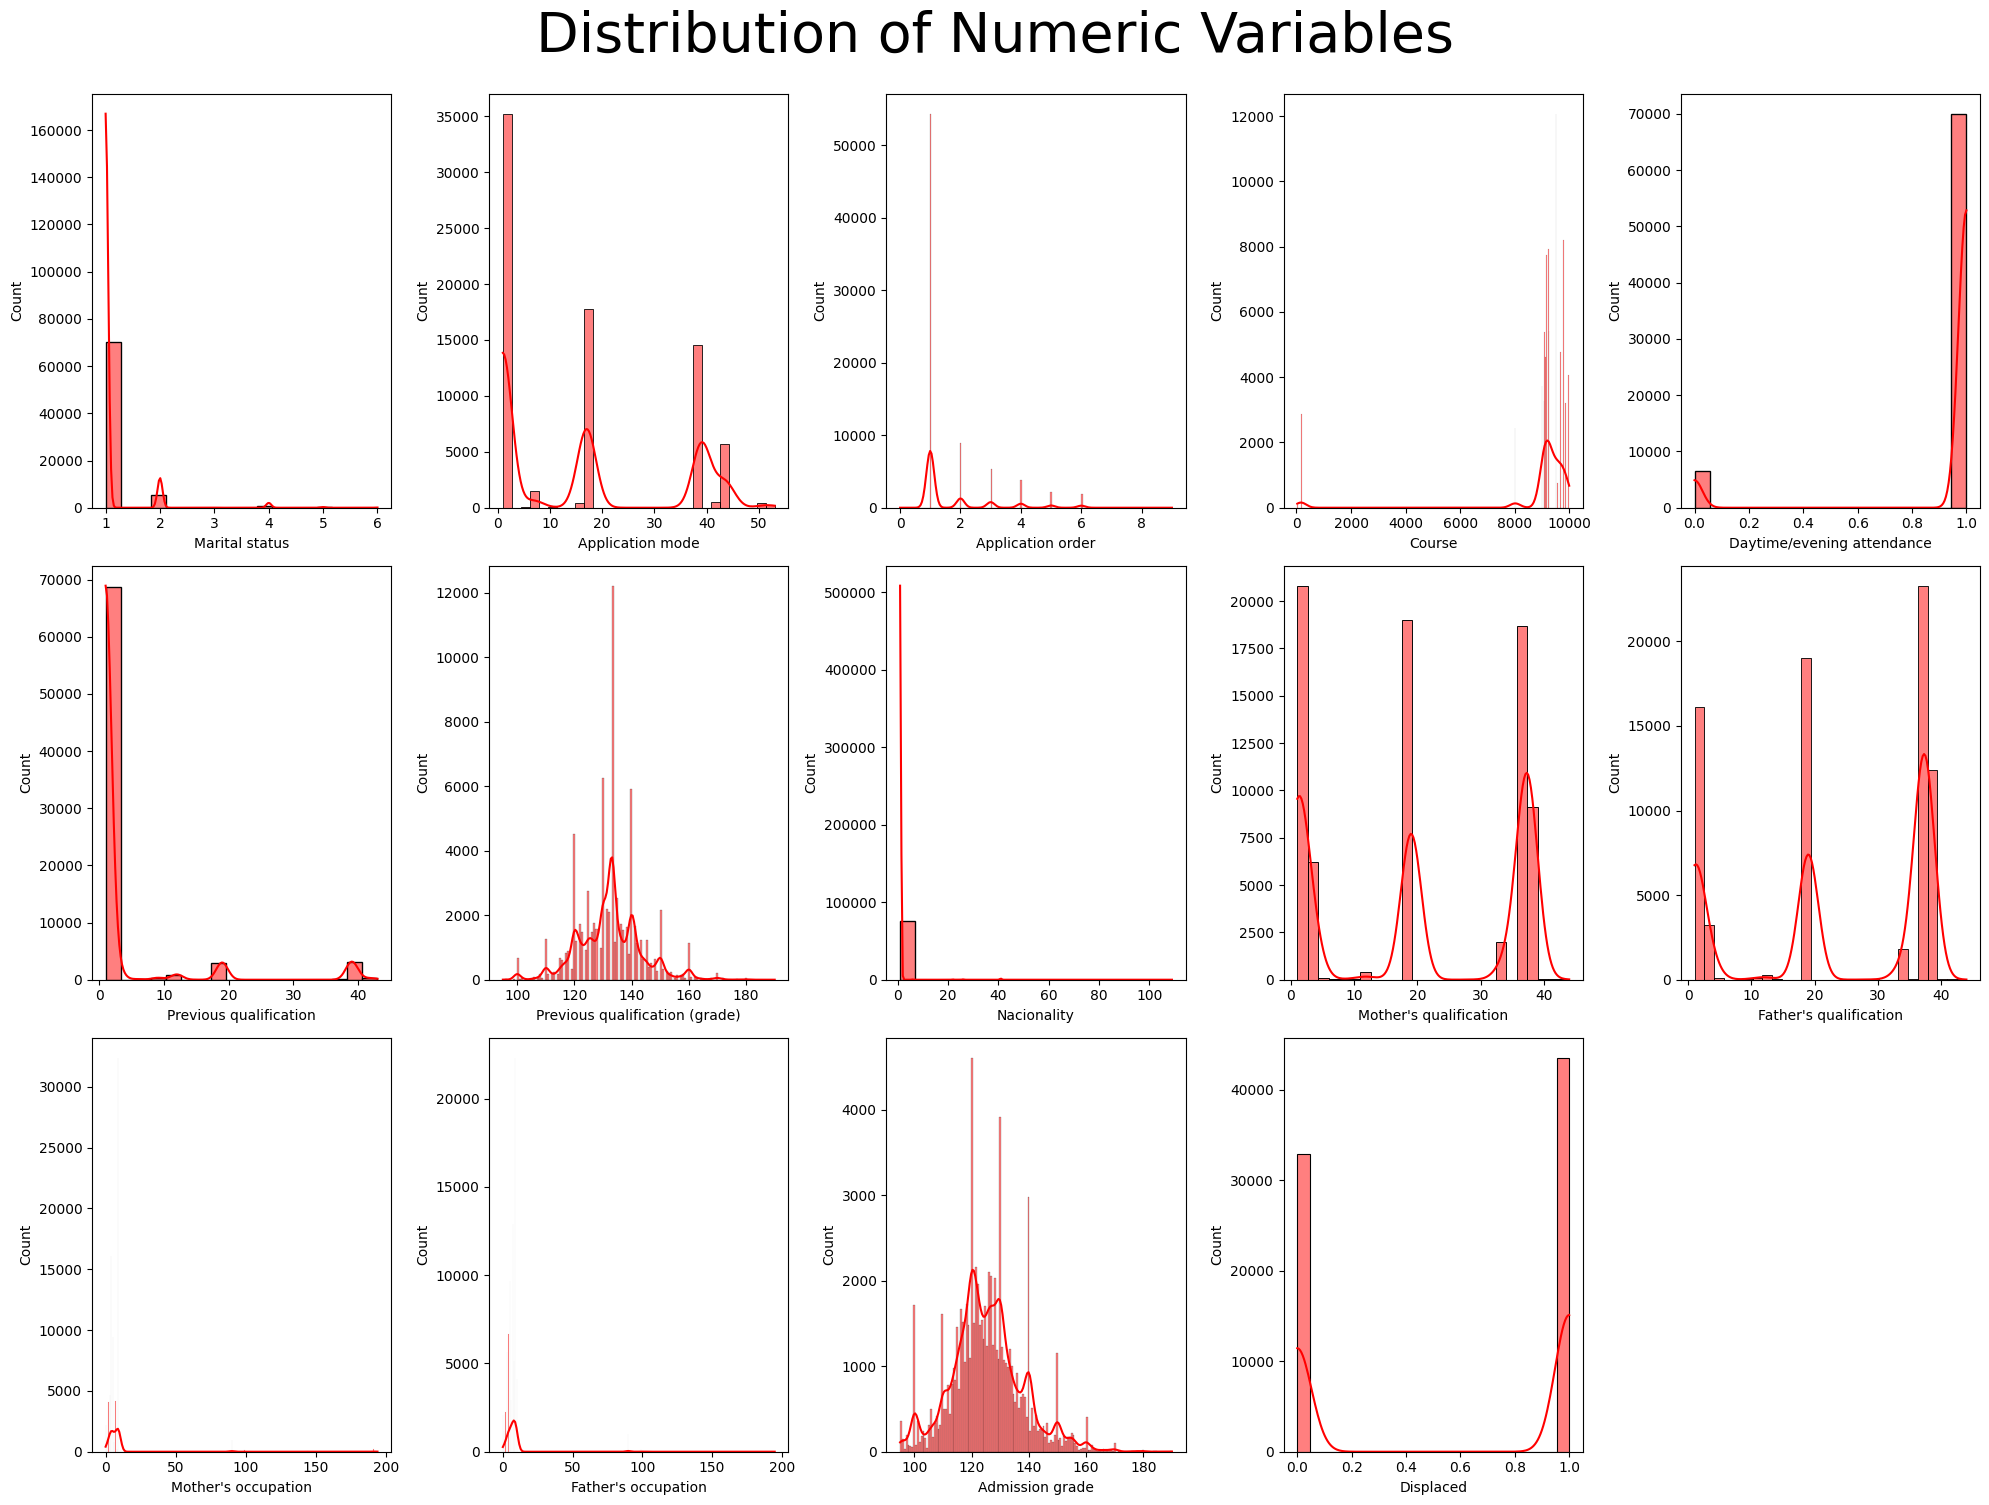

In [149]:
# Distribution of numeric variables
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(tr[column], kde=True, color='red')
        plt.xlabel(column)

    plotnumber += 1

plt.suptitle('Distribution of Numeric Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

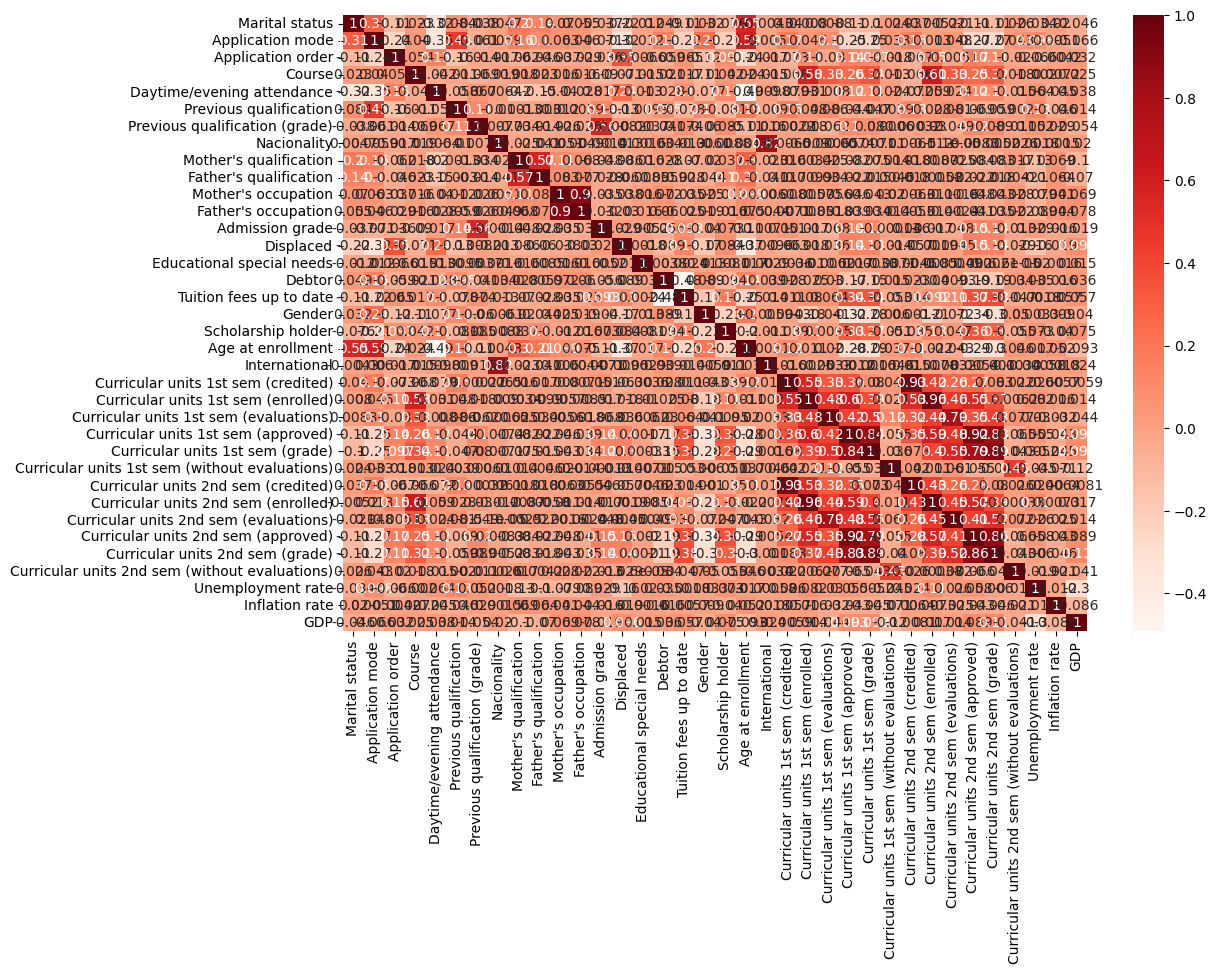

Highly correlated features: [('Nacionality', 'International'), ("Mother's occupation", "Father's occupation"), ('Curricular units 1st sem (credited)', 'Curricular units 2nd sem (credited)'), ('Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)'), ('Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)'), ('Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)'), ('Curricular units 1st sem (approved)', 'Curricular units 2nd sem (grade)'), ('Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)'), ('Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)')]


In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'tr' is your DataFrame and you want to calculate the correlation for all numerical columns
X = tr.select_dtypes(include=['int64', 'float64'])  # Define X

corr_matrix = X.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

# Identify features with high correlation
threshold = 0.8
highly_corr_var = np.where(abs(corr_matrix) > threshold)
highly_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y])
                   for x, y in zip(*highly_corr_var)
                   if x != y and x < y]

print("Highly correlated features:", highly_corr_var)


In [151]:
import numpy as np

# Assuming `corr_matrix` is your correlation matrix and threshold is set, e.g., 0.8
threshold = 0.8
highly_corr_var = np.where(abs(corr_matrix) > threshold)
highly_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y])
                   for x, y in zip(*highly_corr_var)
                   if x != y and x < y]

print("Highly correlated features:", highly_corr_var)


Highly correlated features: [('Nacionality', 'International'), ("Mother's occupation", "Father's occupation"), ('Curricular units 1st sem (credited)', 'Curricular units 2nd sem (credited)'), ('Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)'), ('Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)'), ('Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)'), ('Curricular units 1st sem (approved)', 'Curricular units 2nd sem (grade)'), ('Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)'), ('Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)')]


In [152]:
# List to hold the columns to drop
columns_to_drop = []

# Assuming highly_corr_var contains pairs of correlated features
for pair in highly_corr_var:
    feature_to_drop = pair[0]  # Decide to drop the first feature in the pair (or use pair[1])
    if feature_to_drop not in columns_to_drop:
        columns_to_drop.append(feature_to_drop)

# Print the columns you plan to drop
print("Columns to drop:", columns_to_drop)



Columns to drop: ['Nacionality', "Mother's occupation", 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (approved)']


In [153]:
# Drop the highly correlated features from your dataset
tr = tr.drop(columns=columns_to_drop)


In [154]:
tr.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Father's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0,1,19,5,...,0,0,6,7,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,19,19,9,...,0,0,6,9,0.000000,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,3,19,3,...,0,0,6,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,1,1,3,9500,1,1,131.0,19,3,2,...,0,0,8,11,12.820000,0,11.1,0.6,2.02,Enrolled
4,1,1,2,9500,1,1,132.0,19,37,9,...,0,0,7,12,12.933333,0,7.6,2.6,0.32,Graduate


<Axes: >

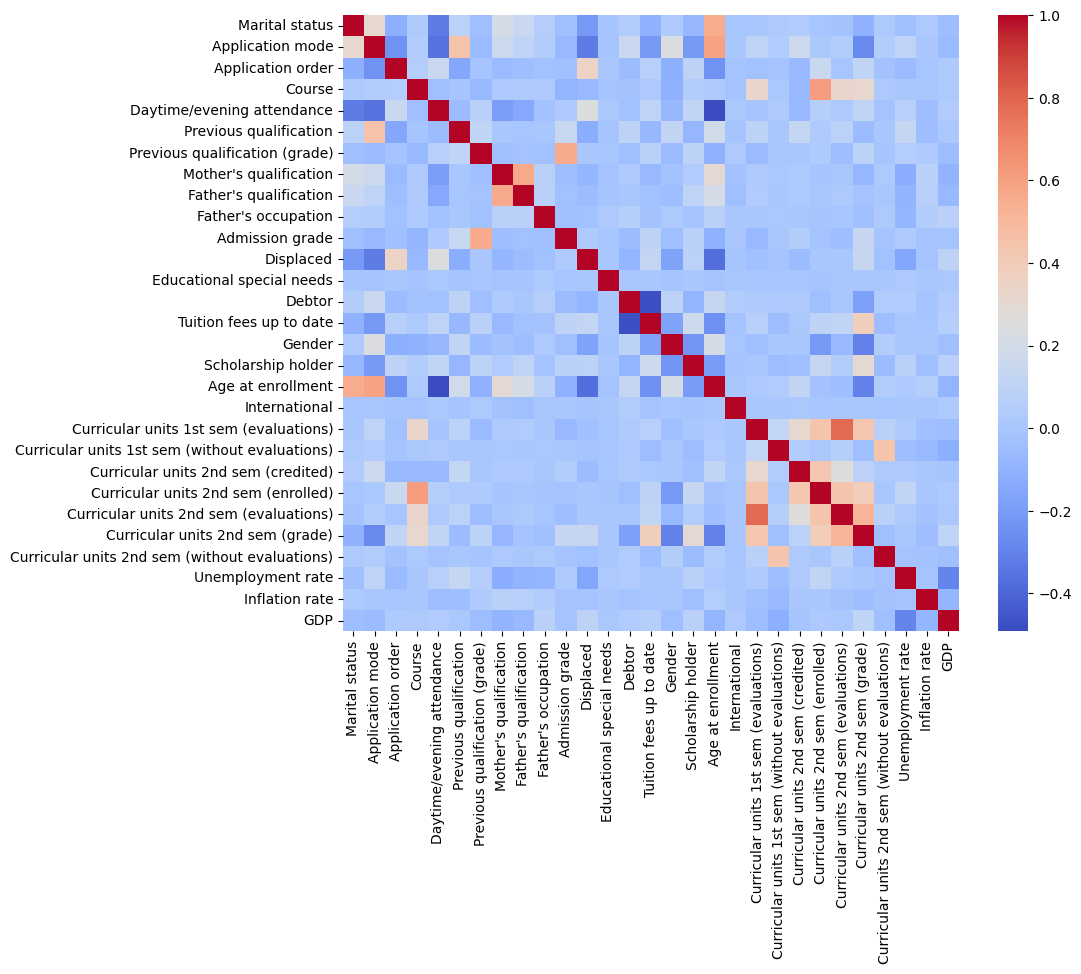

In [155]:
# Make a correlation matrix on 'Target' column
f, ax = plt.subplots(figsize=(10, 8))
corr = tr.drop(columns=['Target']).corr()
corr.style.background_gradient(cmap='coolwarm')

# Plot the correlation matrix
sns.heatmap(corr, square=True, cmap='coolwarm')

In [156]:
# Encode "Target" Varibale using label encoder

le = LabelEncoder()
tr['Target'] = le.fit_transform(tr['Target'])

In [157]:
tr['Target'].value_counts()

,count
Target,
2,36282
0,25296
1,14940


# Model

In [158]:
X = tr.drop(columns=['Target'])
Y = tr['Target']

In [159]:
# Encode "Target" Varibale using label encoder

le = LabelEncoder()
tr['Target'] = le.fit_transform(tr['Target'])

In [160]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [161]:
!pip install catboost
!pip install xgboost
!pip install lightgbm

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [162]:
# Initialize the models
rd = RandomForestClassifier(n_estimators=100, random_state=42)
cb = CatBoostClassifier(n_estimators=100, random_state=42, silent=True)
xgb = XGBClassifier(n_estimators=100, random_state=42)
lgbm = LGBMClassifier(n_estimators=100, random_state=42)

# Fit the models
rd.fit(X_train, y_train)
cb.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

# Make predictions
y_pred = rd.predict(X_test)
y_pred_cb = cb.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_lgbm = lgbm.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 990
[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 29
[LightGBM] [Info] Start training from score -1.105333
[LightGBM] [Info] Start training from score -1.635907
[LightGBM] [Info] Start training from score -0.746287


In [163]:
# import classification report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [164]:
def evaluate(model, X_test, y_test):
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='macro')
    recall = recall_score(y_test, pred, average='macro')
    f1 = f1_score(y_test, pred, average='macro')
    print(classification_report(y_test, pred))
    print('Accuracy: %f' % accuracy)
    print('Precision: %f' % precision)
    print('Recall: %f' % recall)
    print('F1 score: %f' % f1)
    print("================================================================")

In [165]:
evaluate(rd, X_test, y_test)

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      5028
           1       0.62      0.56      0.59      3017
           2       0.82      0.91      0.87      7259

    accuracy                           0.81     15304
   macro avg       0.78      0.76      0.77     15304
weighted avg       0.81      0.81      0.80     15304

Accuracy: 0.807697
Precision: 0.778562
Recall: 0.759008
F1 score: 0.766754


In [166]:
evaluate(cb, X_test, y_test)

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      5028
           1       0.63      0.59      0.61      3017
           2       0.83      0.91      0.87      7259

    accuracy                           0.81     15304
   macro avg       0.78      0.77      0.78     15304
weighted avg       0.81      0.81      0.81     15304

Accuracy: 0.813709
Precision: 0.784872
Recall: 0.769434
F1 score: 0.775768


In [167]:
evaluate(xgb, X_test, y_test)

              precision    recall  f1-score   support

           0       0.90      0.82      0.85      5028
           1       0.62      0.59      0.61      3017
           2       0.84      0.90      0.87      7259

    accuracy                           0.81     15304
   macro avg       0.78      0.77      0.78     15304
weighted avg       0.81      0.81      0.81     15304

Accuracy: 0.813186
Precision: 0.784071
Recall: 0.770157
F1 score: 0.775903


In [168]:
evaluate(lgbm, X_test, y_test)

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      5028
           1       0.62      0.59      0.61      3017
           2       0.83      0.91      0.87      7259

    accuracy                           0.81     15304
   macro avg       0.79      0.77      0.78     15304
weighted avg       0.81      0.81      0.81     15304

Accuracy: 0.814362
Precision: 0.786482
Recall: 0.770974
F1 score: 0.777235


In [169]:
# Evaluate the models
accuracy_rd = accuracy_score(y_test, y_pred)
accuracy_cb = accuracy_score(y_test, y_pred_cb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)

In [170]:
# Determine the best model
best_model = max([(rd, accuracy_cb), (cb, accuracy_cb), (xgb, accuracy_xgb), (lgbm, accuracy_lgbm)], key=lambda x: x[1])[0]

# Check the accuracy of the best model
print("Accuracy of the Best Model on test: {:.2f}%".format(best_model.score(X_test, y_test) * 100))
print("Accuracy of the Best Model on train: {:.2f}%".format(best_model.score(X_train, y_train) * 100))

Accuracy of the Best Model on test: 81.44%
Accuracy of the Best Model on train: 82.90%


# **Hyperparameter tuning**

In [171]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [172]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid for RandomizedSearchCV with reduced ranges
param_grid_lgbm = {
    'n_estimators': np.arange(100, 201, 100),  # Corrected range for estimators
    'max_depth': np.arange(5, 10, 5),  # Include -1 for no limit
    'learning_rate': np.logspace(-3, -1, 5),  # Logarithmic scale for learning rates
    'num_leaves': np.arange(30, 100, 20),  # Number of leaves
    'min_child_samples': np.arange(10, 101, 20),  # Min samples in a leaf
    'subsample': [1.0],  # Subsample ratios
    'colsample_bytree': [1.0],  # Column subsample ratios
    'reg_alpha': np.linspace(0, 1, 2),  # L1 regularization
    'reg_lambda': np.linspace(0, 1, 2),  # L2 regularization
}

# Initialize the RandomizedSearchCV for LightGBM
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_grid_lgbm,
    n_iter=100,  # Reduced number of parameter combinations to try
    cv=2,  # Reduced to 2-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model with training data
random_search_lgbm.fit(X_train, y_train)

# Print the best parameters and best score
print("LightGBM - Best parameters found: ", random_search_lgbm.best_params_)
print("LightGBM - Best accuracy: ", random_search_lgbm.best_score_)

# Evaluate the best model
best_lgbm_model = random_search_lgbm.best_estimator_
evaluate(best_lgbm_model, X_test, y_test)


Fitting 2 folds for each of 100 candidates, totalling 200 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 990
[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 29
[LightGBM] [Info] Start training from score -1.105333
[LightGBM] [Info] Start training from score -1.635907
[LightGBM] [Info] Start training from score -0.746287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

# **Prediction**

In [173]:
ts = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CI Assignment/test.csv')

In [174]:
pred = best_lgbm_model.predict(ts[X_train.columns])

In [175]:
ts['Target'] = pred

In [176]:
ts.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,8,0,0,0.000000,0,13.9,-0.3,0.79,0
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,6,6,6,13.500000,0,11.1,0.6,2.02,2
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,6,11,5,11.000000,0,15.5,2.8,-4.06,2
3,76521,1,44,1,9147,1,39,130.0,1,1,...,3,8,14,5,11.000000,0,8.9,1.4,3.51,1
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,6,9,4,10.666667,2,7.6,2.6,0.32,1


In [177]:
label_mapping = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}

pred_labels = np.vectorize(label_mapping.get)(pred)

In [178]:
sb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CI Assignment/sample_submission.csv')

In [179]:
sb['Target'] = pred_labels
sb.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled


# **Load Model**

In [180]:
sb.to_csv('/content/drive/MyDrive/Colab Notebooks/CI Assignment/Exports/submission.csv', index=False)

In [181]:
#Saving model
import pickle
pickle.dump(best_lgbm_model, open('/content/drive/MyDrive/Colab Notebooks/CI Assignment/Exports/submission.pkl', 'wb'))

In [182]:
#Load model
best_lgbm_model = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/CI Assignment/Exports/submission.pkl', 'rb'))